In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from tqdm import tqdm_notebook as tqdm

In [3]:
ls 

'/Users/james/somethingmore/jupyter_notebooks'

In [5]:
rec=pd.read_sas('Recommendation.sas7bdat')
ipo=pd.read_sas('ipos_1996_2000.sas7bdat')
ret=pd.read_sas('AssignmentReturns.sas7bdat')
ret=ret.rename(index=str, columns={"DATE": "date", "PERMNO": "permno"})
mret=pd.read_sas('Market_returns.sas7bdat')

In [6]:
iporec=pd.merge(ipo,rec,on='CUSIP',how='outer') 
n_iporec = iporec.drop_duplicates(['permno'])

In [7]:
ret=ret.merge(mret,on='date')
ret['ar']=ret['RET']-ret['VWRETD']
ret=ret.dropna(axis=0,how='any')

In [8]:
ret.sort_values(by=['permno','date'], inplace=True)

In [9]:
all_d=ret.merge(n_iporec,on='permno')

In [10]:
all_d=all_d.dropna(axis=0,how='any')

In [11]:
all_d=all_d.drop(['CUSIP_x'],axis=1)
all_d=all_d.rename(columns={"CUSIP_y": "cusip"})

In [12]:
all_d['date']=pd.to_datetime(all_d['date'])
all_d['ANNDATS']=pd.to_datetime(all_d['ANNDATS'])

In [13]:
#%debug
all_d['rel_day'] = str(0)
keys = []
for key in tqdm(np.unique(all_d['permno'])):
    try:
        #all_d[all_d['permno']==key]
        tmpdf = all_d[all_d['permno']==key]
        tmpdf['date'][np.isin(tmpdf['date'],tmpdf['ANNDATS'])] #找到日期相同的位置
        #np.where(np.isin(tmpdf['date'],tmpdf['ANNDATS'])==1)[0]
        #tmpposition = np.where((tmpdf['date']==tmpdf['ANNDATS'])==1)[0][0] 不能解决anndate非交易日问题
        #(pd.to_datetime(tmpdf['date']) - pd.to_datetime(tmpdf['ANNDATS'])).dt.days 日期做差
        tmpposition = np.argwhere((pd.to_datetime(tmpdf['date']) - pd.to_datetime(tmpdf['ANNDATS'])).dt.days >=0)[0][0] #找做差的最小的非负值的位置
        #tmpdf.iloc[tmpposition]
        #tmpdf['rel-day'] = np.arange(-tmpposition+1,tmpdf.shape[0]+1-tmpposition)
        all_d['rel_day'].iloc[np.where(all_d['permno']==key)] = \
                np.arange(-tmpposition,tmpdf.shape[0]-tmpposition)
    except:
        print (key)
        keys.append(key)

/Users/james/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)
/Users/james/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


84201.0



In [14]:
all_d_drop = all_d[~np.isin(all_d['permno'],keys)]

In [15]:
all_d_drop['rel_day']=pd.to_numeric(all_d_drop['rel_day'])

/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
all_d_filter=all_d_drop[(all_d_drop['rel_day']<=5 )& (all_d_drop['rel_day']>=-5)]

In [17]:
all_d_filter.iloc[10000:20000]

permno       date       RET    VWRETD        ar Offer_Date  \
995429   85695.0 1998-01-14  0.020408  0.006375  0.014033 1997-12-17   
995430   85695.0 1998-01-15 -0.060000 -0.005706 -0.054294 1997-12-17   
995431   85695.0 1998-01-16 -0.063830  0.011200 -0.075030 1997-12-17   
995432   85695.0 1998-01-20  0.000000  0.016307 -0.016307 1997-12-17   
995433   85695.0 1998-01-21 -0.011364 -0.006187 -0.005176 1997-12-17   
995916   85696.0 1998-03-27 -0.037037 -0.003699 -0.033338 1997-12-03   
995917   85696.0 1998-03-30 -0.038462 -0.002188 -0.036274 1997-12-03   
995918   85696.0 1998-03-31 -0.040000  0.007670 -0.047670 1997-12-03   
995919   85696.0 1998-04-01  0.000000  0.006142 -0.006142 1997-12-03   
995920   85696.0 1998-04-02 -0.083333  0.008186 -0.091520 1997-12-03   
995921   85696.0 1998-04-03 -0.045455  0.001944 -0.047399 1997-12-03   
995922   85696.0 1998-04-06  0.130952 -0.002450  0.133402 1997-12-03   
995923   85696.0 1998-04-07  0.073684 -0.010430  0.084114 1997-12-03   
995924   85696.0 1998-04-08  0.117647 -0.004353  0.122000 1997-12-03   
995925   85696.0 1998-04-09 -0.035088  0.007810 -0.042898 1997-12-03   
995926   85696.0 1998-04-13  0.036364 -0.000318  0.036682 1997-12-03   
996151   85697.0 1998-01-26 -0.016575 -0.002027 -0.014548 1997-12-17   
996152   85697.0 1998-01-27  0.011236  0.009813  0.001423 1997-12-17   
996153   85697.0 1998-01-28  0.011111  0.010032  0.001079 1997-12-17   
996154   85697.0 1998-01-29 -0.010989  0.007371 -0.018360 1997-12-17   
996155   85697.0 1998-01-30  0.000000 -0.003797  0.003797 1997-12-17   
996156   85697.0 1998-02-02 -0.033333  0.018907 -0.052241 1997-12-17   
996157   85697.0 1998-02-03 -0.022989  0.005191 -0.028179 1997-12-17   
996158   85697.0 1998-02-04 -0.011765  0.002688 -0.014452 1997-12-17   
996159   85697.0 1998-02-05 -0.035714 -0.000803 -0.034911 1997-12-17   
996160   85697.0 1998-02-06  0.037037  0.007613  0.029424 1997-12-17   
996161   85697.0 1998-02-09  0.029762 -0.000651  0.030413 1997-12-17   
997219   85700.0 1998-09-09  0.030043 -0.017530  0.047573 1997-12-04   
997220   85700.0 1998-09-10 -0.066667 -0.024596 -0.042071 1997-12-04   
997221   85700.0 1998-09-11  0.080357  0.026083  0.054274 1997-12-04   
...          ...        ...       ...       ...       ...        ...   
1540416  88730.0 2000-12-01  0.038462  0.006214  0.032247 2000-10-11   
1540417  88730.0 2000-12-04 -0.074074  0.003688 -0.077762 2000-10-11   
1540418  88730.0 2000-12-05  0.013333  0.045365 -0.032032 2000-10-11   
1540419  88730.0 2000-12-06 -0.052632 -0.016471 -0.036160 2000-10-11   
1540420  88730.0 2000-12-07 -0.013889 -0.005885 -0.008004 2000-10-11   
1540421  88730.0 2000-12-08 -0.042254  0.028493 -0.070746 2000-10-11   
1540422  88730.0 2000-12-11 -0.088235  0.011996 -0.100232 2000-10-11   
1540423  88730.0 2000-12-12 -0.209677 -0.010884 -0.198793 2000-10-11   
1540424  88730.0 2000-12-13  0.102041 -0.011571  0.113612 2000-10-11   
1540425  88730.0 2000-12-14  0.037037 -0.016985  0.054022 2000-10-11   
1540426  88730.0 2000-12-15  0.000000 -0.017770  0.017770 2000-10-11   
1540697  88731.0 2000-10-23  0.024390  0.000145  0.024245 2000-10-02   
1540698  88731.0 2000-10-24  0.037037 -0.000982  0.038019 2000-10-02   
1540699  88731.0 2000-10-25 -0.035714 -0.027449 -0.008265 2000-10-02   
1540700  88731.0 2000-10-26  0.013228  0.000604  0.012623 2000-10-02   
1540701  88731.0 2000-10-27  0.033943  0.008626  0.025317 2000-10-02   
1540702  88731.0 2000-10-30  0.171717  0.006716  0.165002 2000-10-02   
1540703  88731.0 2000-10-31 -0.040948  0.028374 -0.069322 2000-10-02   
1540704  88731.0 2000-11-01 -0.029213 -0.004306 -0.024907 2000-10-02   
1540705  88731.0 2000-11-02  0.004630  0.010029 -0.005399 2000-10-02   
1540706  88731.0 2000-11-03  0.073733  0.000550  0.073182 2000-10-02   
1540707  88731.0 2000-11-06 -0.012876  0.001271 -0.014147 2000-10-02   
1541010  88733.0 2000-10-31 -0.145390  0.028374 -0.173764 2000-10-05   
1541011  88733.0 2000-11-01  0.128631 -0.004306  0

In [18]:
all_d_filter['car']=all_d_filter['ar'].groupby(all_d_filter['permno']).cumsum()

/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
all_d_filter['sample']='the others'
all_d_filter['IRECCD']=pd.to_numeric(all_d_filter['IRECCD'])
all_d_filter.loc[all_d_filter.IRECCD==1, 'sample'] = 'strong buy' 
all_d_filter.loc[all_d_filter.IRECCD==2, 'sample'] =  'buy'

/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/james/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [20]:
all_d_filter.sort_values(by=['sample','rel_day'], inplace=True)
mcar=all_d_filter['car'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).mean()
ncar=all_d_filter['car'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).count()
mar=all_d_filter['ar'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).mean()
nar=all_d_filter['ar'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).count()

/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<div class='alert alert-block alert-info'>
 <b>debug</b>!
</div>

In [21]:
all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-5)].shape[0]

878

In [22]:
all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-4)].shape[0]

880

In [23]:
np.unique(all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-5)]['permno'],return_counts=1)[0].shape

(878,)

In [24]:
np.unique(all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-4)]['permno'],return_counts=1)[0].shape

(880,)

In [25]:
np.setdiff1d(np.array(all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-1)]['permno']),
             np.array(all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-3)]['permno']),
    )

array([87495.])

In [26]:
np.array(all_d_filter[(all_d_filter['sample']=='buy')&(all_d_filter['rel_day']==-4)]['permno'])

array([82808., 82827., 82837., 82840., 82851., 82857., 82861., 83111.,
       83124., 83127., 83128., 83129., 83131., 83138., 83144., 83148.,
       83150., 83152., 83154., 83160., 83176., 83190., 83191., 83193.,
       83232., 83235., 83238., 83242., 83251., 83259., 83262., 83263.,
       83266., 83269., 83272., 83274., 83275., 83278., 83280., 83283.,
       83284., 83292., 83293., 83294., 83298., 83299., 83304., 83306.,
       83308., 83313., 83318., 83322., 83340., 83356., 83357., 83358.,
       83365., 83368., 83378., 83379., 83381., 83382., 83383., 83397.,
       83400., 83401., 83403., 83405., 83415., 83418., 83422., 83423.,
       83429., 83430., 83431., 83435., 83449., 83453., 83457., 83475.,
       83485., 83497., 83499., 83500., 83508., 83512., 83520., 83525.,
       83527., 83539., 83547., 83549., 83550., 83553., 83555., 83558.,
       83559., 83561., 83568., 83570., 83574., 83575., 83576., 83578.,
       83580., 83581., 83582., 83595., 83597., 83608., 83616., 83618.,
      

In [27]:
all_d_filter[all_d_filter['permno'] ==87495.]

permno       date       RET    VWRETD        ar Offer_Date  \
1425538  87495.0 1999-12-10 -0.023148  0.005711 -0.028859 1999-12-09   
1425539  87495.0 1999-12-13 -0.033175  0.000989 -0.034165 1999-12-09   
1425540  87495.0 1999-12-14 -0.004902 -0.012648  0.007746 1999-12-09   
1425541  87495.0 1999-12-15  0.004926  0.005371 -0.000445 1999-12-09   
1425542  87495.0 1999-12-16  0.019608  0.006938  0.012670 1999-12-09   
1425543  87495.0 1999-12-17  0.009615  0.003053  0.006563 1999-12-09   
1425544  87495.0 1999-12-20 -0.014286 -0.000491 -0.013795 1999-12-09   

               cusip   TICKER    ANNDATS  ANNTIMS  AMASKCD  IRECCD  rel_day  \
1425538  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2       -1   
1425539  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        0   
1425540  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        1   
1425541  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        2   
1425542  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        3   
1425543  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        4   
1425544  b'45866V10'  b'IREP' 1999-12-13  39811.0  10402.0       2        5   

              car sample  
1425538 -0.028859    buy  
1425539 -0.063024    buy  
1425540 -0.055277    buy  
1425541 -0.055722    buy  
1425542 -0.043052    buy  
1425543 -0.036490    buy  
1425544 -0.050285    buy

In [28]:
all_d_filter[all_d_filter['permno'] ==86171.0]

permno       date       RET    VWRETD        ar Offer_Date  \
1134819  86171.0 1998-06-24  0.011364  0.011204  0.000159 1998-06-22   
1134820  86171.0 1998-06-25 -0.011236 -0.002643 -0.008593 1998-06-22   
1134821  86171.0 1998-06-26  0.000000  0.003007 -0.003007 1998-06-22   
1134822  86171.0 1998-06-29  0.000000  0.005637 -0.005637 1998-06-22   
1134823  86171.0 1998-06-30  0.000000 -0.001378  0.001378 1998-06-22   
1134824  86171.0 1998-07-01  0.000000  0.010830 -0.010830 1998-06-22   
1134825  86171.0 1998-07-02  0.011364 -0.001669  0.013032 1998-06-22   
1134826  86171.0 1998-07-06  0.011236  0.008519  0.002717 1998-06-22   
1134827  86171.0 1998-07-07 -0.016667 -0.001406 -0.015260 1998-06-22   
1134828  86171.0 1998-07-08 -0.005650  0.008744 -0.014394 1998-06-22   

               cusip   TICKER    ANNDATS  ANNTIMS  AMASKCD  IRECCD  rel_day  \
1134819  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2       -4   
1134820  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2       -3   
1134821  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2       -2   
1134822  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2       -1   
1134823  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        0   
1134824  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        1   
1134825  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        2   
1134826  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        3   
1134827  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        4   
1134828  b'43324510'  b'HORT' 1998-06-30  46014.0   9913.0       2        5   

              car sample  
1134819  0.000159    buy  
1134820 -0.008433    buy  
1134821 -0.011441    buy  
1134822 -0.017078    buy  
1134823 -0.015700    buy  
1134824 -0.026531    buy  
1134825 -0.013498    buy  
1134826 -0.010782    buy  
1134827 -0.026042    buy  
1134828 -0.040436    buy

In [29]:
all_d[all_d['permno'] ==87495]

permno       date       RET    VWRETD        ar Offer_Date  \
1425538  87495.0 1999-12-10 -0.023148  0.005711 -0.028859 1999-12-09   
1425539  87495.0 1999-12-13 -0.033175  0.000989 -0.034165 1999-12-09   
1425540  87495.0 1999-12-14 -0.004902 -0.012648  0.007746 1999-12-09   
1425541  87495.0 1999-12-15  0.004926  0.005371 -0.000445 1999-12-09   
1425542  87495.0 1999-12-16  0.019608  0.006938  0.012670 1999-12-09   
1425543  87495.0 1999-12-17  0.009615  0.003053  0.006563 1999-12-09   
1425544  87495.0 1999-12-20 -0.014286 -0.000491 -0.013795 1999-12-09   
1425545  87495.0 1999-12-21 -0.004831  0.015020 -0.019851 1999-12-09   
1425546  87495.0 1999-12-22  0.000000  0.003218 -0.003218 1999-12-09   
1425547  87495.0 1999-12-23  0.000000  0.013464 -0.013464 1999-12-09   
1425548  87495.0 1999-12-27  0.019417 -0.000483  0.019901 1999-12-09   
1425549  87495.0 1999-12-28  0.004762  0.001559  0.003203 1999-12-09   
1425550  87495.0 1999-12-29 -0.042654  0.006568 -0.049222 1999-12-09   
1425551  87495.0 1999-12-30  0.034653  0.000828  0.033826 1999-12-09   
1425552  87495.0 1999-12-31  0.023923  0.006204  0.017719 1999-12-09   
1425553  87495.0 2000-01-03 -0.023364 -0.006809 -0.016555 1999-12-09   
1425554  87495.0 2000-01-04 -0.023923 -0.039656  0.015733 1999-12-09   
1425555  87495.0 2000-01-05 -0.024510 -0.000929 -0.023581 1999-12-09   
1425556  87495.0 2000-01-06 -0.065327 -0.007383 -0.057944 1999-12-09   
1425557  87495.0 2000-01-07 -0.016129  0.032518 -0.048647 1999-12-09   
1425558  87495.0 2000-01-10  0.114754  0.018605  0.096149 1999-12-09   
1425559  87495.0 2000-01-11 -0.088235 -0.016936 -0.071299 1999-12-09   
1425560  87495.0 2000-01-12 -0.043011 -0.006916 -0.036095 1999-12-09   
1425561  87495.0 2000-01-13  0.005618  0.016269 -0.010651 1999-12-09   
1425562  87495.0 2000-01-14  0.039106  0.011138  0.027968 1999-12-09   
1425563  87495.0 2000-01-18  0.075269 -0.000864  0.076133 1999-12-09   
1425564  87495.0 2000-01-19  0.005000  0.004628  0.000372 1999-12-09   
1425565  87495.0 2000-01-20  0.054726 -0.002801  0.057528 1999-12-09   
1425566  87495.0 2000-01-21  0.066038  0.002655  0.063382 1999-12-09   
1425567  87495.0 2000-01-24  0.061947 -0.025312  0.087259 1999-12-09   
...          ...        ...       ...       ...       ...        ...   
1426023  87495.0 2001-11-16  0.001418 -0.001701  0.003119 1999-12-09   
1426024  87495.0 2001-11-19 -0.070822  0.011676 -0.082497 1999-12-09   
1426025  87495.0 2001-11-20  0.097561 -0.008251  0.105812 1999-12-09   
1426026  87495.0 2001-11-21  0.041667 -0.004485  0.046151 1999-12-09   
1426027  87495.0 2001-11-23 -0.046667  0.011704 -0.058370 1999-12-09   
1426028  87495.0 2001-11-26  0.060140  0.007430  0.052710 1999-12-09   
1426029  87495.0 2001-11-27 -0.071240 -0.005064 -0.066176 1999-12-09   
1426030  87495.0 2001-11-28 -0.039773 -0.017338 -0.022434 1999-12-09   
1426031  87495.0 2001-11-29 -0.059172  0.011232 -0.070403 1999-12-09   
1426032  87495.0 2001-11-30 -0.088050 -0.000932 -0.087119 1999-12-09   
1426033  87495.0 2001-12-03 -0.120690 -0.008429 -0.112260 1999-12-09   
1426034  87495.0 2001-12-04  0.039216  0.014756  0.024460 1999-12-09   
1426035  87495.0 2001-12-05 -0.132076  0.023124 -0.155200 1999-12-09   
1426036  87495.0 2001-12-06  0.260870 -0.001086  0.261956 1999-12-09   
1426037  87495.0 2001-12-07 -0.027586 -0.007323 -0.020264 1999-12-09   
1426038  87495.0 2001-12-10  0.042553 -0.015036  0.057589 1999-12-09   
1426039  87495.0 2001-12-11  0.013605 -0.001755  0.015361 1999-12-09   
1426040  87495.0 2001-12-12  0.012584  0.000556  0.012028 1999-12-09   
1426041  87495.0 2001-12-13 -0.019055 -0.015389 -0.003666 1999-12-09   
1426042  87495.0 2001-12-14  0.013514  0.003483  0.010030 1999-12-09   
1426043  87495.0 2001-12-17  0.000000  0.010397 -0.010397 1999-12-09   
1426044  87495.0 2001-12-18 -0.033333  0.008044 -0.041377 1999-12-09   
1426045  87495.0 2001-12-19  0.027586  0.003648  0.023938 1999-12-09   
1426046  87495.0 2001-12-20  0.023490 -0.009357  0

In [30]:
all_d_filter['car'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).count()

sample      rel_day
buy         -5         878
            -4         880
            -3         882
            -2         882
            -1         883
             0         885
             1         885
             2         885
             3         885
             4         885
             5         885
strong buy  -5         892
            -4         895
            -3         898
            -2         900
            -1         902
             0         909
             1         909
             2         909
             3         909
             4         909
             5         909
the others  -5          55
            -4          55
            -3          55
            -2          55
            -1          55
             0          56
             1          56
             2          56
             3          56
             4          56
             5          56
Name: car, dtype: int64

In [31]:
all_d_filter.groupby([all_d_filter['permno']]).count()['rel_day'].iloc[np.where(all_d_filter.groupby([all_d_filter['permno']]).count()['rel_day'] !=11)]

permno
83459.0     7
83790.0     8
83860.0     9
83865.0    10
84226.0     6
85613.0    10
86171.0    10
86339.0    10
86356.0     6
86411.0     6
86740.0     6
86783.0     6
86862.0     9
86868.0     6
86916.0     7
86993.0     8
87018.0     6
87107.0     6
87187.0     6
87342.0     9
87373.0     9
87480.0     9
87489.0     6
87495.0     7
87536.0    10
Name: rel_day, dtype: int64

<div class='alert alert-block alert-success'>
 <b>Debug结束</b>
</div>

### 如果你想filter掉不等于11的那些异常值的话：

In [32]:
rel_missing_permno_ind = all_d_filter.groupby([all_d_filter['permno']]).count()['rel_day'].iloc[\
                        np.where(all_d_filter.groupby([all_d_filter['permno']]).count()['rel_day'] !=11)].index
rel_missing_permno_ind

Float64Index([83459.0, 83790.0, 83860.0, 83865.0, 84226.0, 85613.0, 86171.0,
              86339.0, 86356.0, 86411.0, 86740.0, 86783.0, 86862.0, 86868.0,
              86916.0, 86993.0, 87018.0, 87107.0, 87187.0, 87342.0, 87373.0,
              87480.0, 87489.0, 87495.0, 87536.0],
             dtype='float64', name='permno')

In [33]:
all_d_filter.sort_values(by=['sample','rel_day'], inplace=True)
all_d_drop_rel_missing = all_d_filter[~np.isin(all_d_filter['permno'],rel_missing_permno_ind)]
#all_d_drop_rel_missing是去除了有问题的permno的结果

/Users/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
all_d_drop_rel_missing.groupby([all_d_drop_rel_missing['permno']]).count()['rel_day'].iloc[\
        np.where(all_d_drop_rel_missing.groupby([all_d_drop_rel_missing['permno']]).count()['rel_day'] !=11)].index

Float64Index([], dtype='float64', name='permno')

In [35]:
def get_mean_count_value(df,key):
    '''
    get mean and count, groupby sample and rel day
    '''
    mean=df[key].groupby([df['sample'],df['rel_day']]).mean()
    count=df[key].groupby([df['sample'],df['rel_day']]).count()
    return mean,count

In [36]:
#mcar=all_d_filter['car'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).mean()
#ncar=all_d_filter['car'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).count()
#mar=all_d_filter['ar'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).mean()
#nar=all_d_filter['ar'].groupby([all_d_filter['sample'],all_d_filter['rel_day']]).count()

In [37]:
mcar,ncar = get_mean_count_value(all_d_drop_rel_missing,'car')
mar,nar = get_mean_count_value(all_d_drop_rel_missing,'ar')

In [57]:
all_d_drop_rel_missing

permno       date       RET    VWRETD        ar Offer_Date  \
6929     82808.0 1996-05-16  0.000000  0.000458 -0.000458 1996-01-18   
10740    82827.0 1996-02-20  0.009091 -0.010375  0.019466 1996-01-24   
15103    82837.0 1996-03-14  0.004464  0.004259  0.000205 1996-01-24   
18070    82840.0 1996-02-13 -0.039216 -0.001937 -0.037279 1996-01-22   
20062    82851.0 1996-02-15  0.022388 -0.002695  0.025084 1996-01-24   
21694    82857.0 1996-03-19  0.011858 -0.001157  0.013014 1996-02-22   
23665    82861.0 1996-03-15 -0.010870  0.001548 -0.012418 1996-02-08   
26191    83111.0 1996-04-10  0.014286 -0.010690  0.024976 1996-02-28   
35006    83124.0 1996-03-20  0.015385 -0.002589  0.017974 1996-02-28   
37981    83127.0 1996-03-27 -0.098901 -0.003114 -0.095787 1996-02-08   
39443    83128.0 1996-03-05 -0.111111  0.006692 -0.117803 1996-02-15   
40714    83129.0 1996-03-06 -0.067416 -0.003450 -0.063966 1996-02-16   
43678    83131.0 1996-02-27 -0.026667 -0.004134 -0.022533 1996-02-06   
49798    83138.0 1996-03-07  0.025641  0.001878  0.023763 1996-02-16   
54532    83144.0 1996-03-29 -0.025641 -0.001666 -0.023975 1996-02-28   
57367    83148.0 1997-08-07  0.047619 -0.007025  0.054644 1996-02-14   
58499    83150.0 1996-03-25  0.020619 -0.002551  0.023170 1996-02-13   
61191    83152.0 1996-04-29  0.038961  0.001041  0.037920 1996-02-01   
62608    83154.0 1996-03-05 -0.025210  0.006692 -0.031902 1996-02-14   
65747    83160.0 1996-03-05  0.003690  0.006692 -0.003002 1996-02-06   
77041    83176.0 1996-11-22 -0.028571  0.007377 -0.035948 1996-02-22   
83065    83190.0 1996-04-17 -0.009950 -0.004497 -0.005454 1996-03-25   
84436    83191.0 1996-04-02  0.005291  0.002370  0.002921 1996-03-01   
85091    83193.0 1996-04-08  0.030000 -0.015996  0.045996 1996-03-11   
86352    83232.0 1996-03-29  0.000000 -0.001666  0.001666 1996-03-11   
88545    83235.0 1996-04-10  0.000000 -0.010690  0.010690 1996-03-21   
89561    83238.0 1996-04-25  0.024793  0.004648  0.020145 1996-03-27   
90929    83242.0 1996-04-09  0.037500 -0.000826  0.038326 1996-03-19   
92792    83251.0 1996-03-29  0.000000 -0.001666  0.001666 1996-03-08   
95941    83259.0 1996-04-23  0.148438  0.006045  0.142393 1996-03-21   
...          ...        ...       ...       ...       ...        ...   
1157566  86241.0 1998-08-27 -0.046729 -0.039427 -0.007302 1998-07-16   
1181048  86315.0 1998-10-05  0.005882 -0.019590  0.025473 1998-08-27   
1198864  86501.0 1999-01-25 -0.054852  0.006539 -0.061392 1998-12-10   
1209601  86565.0 1999-03-09 -0.016548 -0.002176 -0.014372 1999-01-22   
1213706  86586.0 1999-03-10  0.241071  0.005636  0.235435 1999-01-28   
1227387  86739.0 1999-03-31 -0.044444 -0.007849 -0.036596 1999-02-18   
1233938  86777.0 1999-04-26  0.060858  0.004590  0.056268 1999-03-18   
1244287  86822.0 1999-05-11 -0.030063  0.011781 -0.041844 1999-04-08   
1249469  86836.0 1999-06-04  0.007519  0.019607 -0.012088 1999-04-29   
1250139  86838.0 1999-05-27 -0.047794 -0.013937 -0.033857 1999-04-23   
1260628  86881.0 1999-06-29  0.174211  0.014267  0.159944 1999-05-24   
1262344  86885.0 1999-06-14 -0.070630 -0.004394 -0.066236 1999-05-12   
1264777  86891.0 1999-06-21  0.022329  0.005829  0.016500 1999-05-19   
1272590  86914.0 1999-06-21  0.050061  0.005829  0.044232 1999-05-17   
1275296  86920.0 1999-06-28 -0.052500  0.011665 -0.064165 1999-05-25   
1287836  86974.0 1999-07-06 -0.027140 -0.000226 -0.026914 1999-06-02   
1300269  87006.0 1999-07-23  0.010949 -0.003257  0.014206 1999-06-17   
1344112  87165.0 1999-09-14  0.058419 -0.005061  0.063480 1999-08-04   
1372122  87284.0 1999-11-10  0.002342  0.005545 -0.003203 1999-10-06   
1409138  87418.0 1999-12-21 -0.032864  0.015020 -0.047884 1999-11-18   
1412320  87427.0 1999-12-20  0.090129 -0.000491  0.090619 1999-11-16   
1454278  87641.0 2000-03-20 -0.101266 -0.016478 -0.084788 2000-02-15   
1460942  87752.0 2000-04-11 -0.091837 -0.010240 -0.081597 2000-03-02   
1462715  87765.0 2000-04-26 -0.014151 -0.011332 -0

In [38]:
all_d_drop_rel_missing.groupby([all_d_drop_rel_missing['sample']]).mean()

permno       RET    VWRETD        ar       ANNTIMS  \
sample                                                                 
buy         85873.038724  0.003701  0.000676  0.003025  50152.132118   
strong buy  85599.758969  0.002670  0.000539  0.002131  49159.993274   
the others  86012.981818 -0.002027  0.000096 -0.002123  50098.036364   

                 AMASKCD    IRECCD  rel_day       car  
sample                                                 
buy         25542.097950  2.000000      0.0  0.029478  
strong buy  24074.141256  1.000000      0.0  0.022452  
the others  26696.145455  3.018182      0.0 -0.020527

In [39]:
all_d_drop_rel_missing.groupby([all_d_drop_rel_missing['rel_day']]).mean()

permno       RET    VWRETD        ar       ANNTIMS  \
rel_day                                                             
-5       85743.686027  0.003725  0.000144  0.003581  49665.576986   
-4       85743.686027  0.007638  0.000551  0.007087  49665.576986   
-3       85743.686027  0.006212  0.001241  0.004970  49665.576986   
-2       85743.686027  0.008344  0.000498  0.007847  49665.576986   
-1       85743.686027  0.008602  0.001019  0.007583  49665.576986   
 0       85743.686027  0.002821  0.000342  0.002479  49665.576986   
 1       85743.686027  0.001614  0.000128  0.001486  49665.576986   
 2       85743.686027 -0.001909  0.000619 -0.002529  49665.576986   
 3       85743.686027 -0.001270  0.000566 -0.001836  49665.576986   
 4       85743.686027 -0.003051  0.000656 -0.003707  49665.576986   
 5       85743.686027  0.000541  0.000742 -0.000200  49665.576986   

              AMASKCD    IRECCD       car  
rel_day                                    
-5       24859.388493  1.541918  0.003581  
-4       24859.388493  1.541918  0.010667  
-3       24859.388493  1.541918  0.015638  
-2       24859.388493  1.541918  0.023484  
-1       24859.388493  1.541918  0.031067  
 0       24859.388493  1.541918  0.033546  
 1       24859.388493  1.541918  0.035032  
 2       24859.388493  1.541918  0.032504  
 3       24859.388493  1.541918  0.030667  
 4       24859.388493  1.541918  0.026961  
 5       24859.388493  1.541918  0.026760

In [40]:
np.unique(all_d_drop_rel_missing['sample'])

array(['buy', 'strong buy', 'the others'], dtype=object)

In [41]:
np.unique(all_d_drop_rel_missing['rel_day'])

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [42]:
from scipy.stats import ttest_1samp

In [43]:
for i in np.unique(all_d_drop_rel_missing['sample']):
    for j in np.unique(all_d_drop_rel_missing['rel_day']):
        #display(all_d_drop_rel_missing[(all_d_drop_rel_missing['sample']==i)&(all_d_drop_rel_missing['rel_day']==j)])
        tmpar = all_d_drop_rel_missing[(all_d_drop_rel_missing['sample']==i)&(all_d_drop_rel_missing['rel_day']==j)]['ar']
        print ( i,j)
        print (ttest_1samp(tmpar, 0) )
        print (np.mean(tmpar*100))

buy -5
Ttest_1sampResult(statistic=3.266726913116986, pvalue=0.001130228059681989)
0.7659245609454136
buy -4
Ttest_1sampResult(statistic=3.866632901138333, pvalue=0.00011850027634842519)
0.8180556093565483
buy -3
Ttest_1sampResult(statistic=2.6083318377181377, pvalue=0.00925325434666067)
0.6092700061782359
buy -2
Ttest_1sampResult(statistic=4.048993867532263, pvalue=5.598758032430844e-05)
0.9209394383560282
buy -1
Ttest_1sampResult(statistic=1.7872850624774939, pvalue=0.07423667115381773)
0.434718204563836
buy 0
Ttest_1sampResult(statistic=0.5722171345523805, pvalue=0.5673215267689196)
0.14826270505680636
buy 1
Ttest_1sampResult(statistic=0.24479663485026637, pvalue=0.8066711639385634)
0.05927425957686158
buy 2
Ttest_1sampResult(statistic=-0.8638493405800767, pvalue=0.3879068522584582)
-0.19719064351241805
buy 3
Ttest_1sampResult(statistic=0.0148650828139722, pvalue=0.9881431976327495)
0.0030190486209686206
buy 4
Ttest_1sampResult(statistic=-1.0862209046095517, pvalue=0.277679735963669

In [44]:
def t_test_table(testkey):
    testtable = pd.DataFrame(index=np.unique(all_d_drop_rel_missing['rel_day']),columns=np.unique(all_d_drop_rel_missing['sample']))
    testtable_pvalue  = pd.DataFrame(index=np.unique(all_d_drop_rel_missing['rel_day']),columns=np.unique(all_d_drop_rel_missing['sample']))
    for i in np.unique(all_d_drop_rel_missing['sample']):
        for j in np.unique(all_d_drop_rel_missing['rel_day']):
            #display(all_d_drop_rel_missing[(all_d_drop_rel_missing['sample']==i)&(all_d_drop_rel_missing['rel_day']==j)])
            tmpcar = all_d_drop_rel_missing[(all_d_drop_rel_missing['sample']==i)&(all_d_drop_rel_missing['rel_day']==j)][testkey]
            testtable.loc[j,i] = ttest_1samp(tmpcar, 0)[0]
            testtable_pvalue.loc[j,i] = ttest_1samp(tmpcar, 0)[1]
            #print ( i,j)
            #print (ttest_1samp(tmpcar, 0) )
            #print (np.mean(tmpcar*100))
    return testtable,testtable_pvalue

ar_testtable,ar_testtable_pvalue = t_test_table('ar')
car_testtable,car_testtable_pvalue = t_test_table('car')

In [45]:
display(ar_testtable)
display(ar_testtable_pvalue)

buy strong buy  the others
-5    3.26673   0.205027    -1.00801
-4    3.86663    3.24926    0.501919
-3    2.60833    2.25509  0.00644451
-2    4.04899     3.2631    0.130784
-1    1.78729    4.80385   -0.755657
 0   0.572217    1.82051   -0.862591
 1   0.244797    1.46905    -1.27191
 2  -0.863849   -1.53556   -0.495334
 3  0.0148651    -1.9257   -0.351328
 4   -1.08622   -3.56995     1.71373
 5  0.0454579  -0.313648    0.079284

buy   strong buy the others
-5   0.00113023     0.837598   0.317944
-4    0.0001185    0.0012004   0.617765
-3   0.00925325    0.0243698   0.994882
-2  5.59876e-05   0.00114395   0.896432
-1    0.0742367  1.82553e-06   0.453139
 0     0.567322    0.0690164   0.392177
 1     0.806671     0.142171   0.208855
 2     0.387907     0.125002   0.622374
 3     0.988143    0.0544598   0.726709
 4      0.27768  0.000376138  0.0923145
 5     0.963753     0.753862     0.9371

In [46]:
all_d_drop_rel_missing.groupby([all_d_drop_rel_missing['sample'],all_d_drop_rel_missing['rel_day']]).mean()*100

permno       RET    VWRETD        ar       ANNTIMS  \
sample     rel_day                                                             
buy        -5       8.587304e+06  0.783166  0.017241  0.765925  5.015213e+06   
           -4       8.587304e+06  0.877414  0.059358  0.818056  5.015213e+06   
           -3       8.587304e+06  0.727518  0.118248  0.609270  5.015213e+06   
           -2       8.587304e+06  1.012755  0.091816  0.920939  5.015213e+06   
           -1       8.587304e+06  0.539876  0.105158  0.434718  5.015213e+06   
            0       8.587304e+06  0.218770  0.070507  0.148263  5.015213e+06   
            1       8.587304e+06  0.059498  0.000224  0.059274  5.015213e+06   
            2       8.587304e+06 -0.089646  0.107544 -0.197191  5.015213e+06   
            3       8.587304e+06  0.036280  0.033261  0.003019  5.015213e+06   
            4       8.587304e+06 -0.146941  0.097991 -0.244932  5.015213e+06   
            5       8.587304e+06  0.051889  0.041866  0.010023  5.015213e+06   
strong buy -5       8.559976e+06  0.042229  0.002007  0.040223  4.915999e+06   
           -4       8.559976e+06  0.689644  0.068101  0.621542  4.915999e+06   
           -3       8.559976e+06  0.553865  0.137036  0.416828  4.915999e+06   
           -2       8.559976e+06  0.720028  0.031029  0.688998  4.915999e+06   
           -1       8.559976e+06  1.247163  0.093228  1.153935  4.915999e+06   
            0       8.559976e+06  0.442331 -0.000430  0.442761  4.915999e+06   
            1       8.559976e+06  0.353069  0.029392  0.323677  4.915999e+06   
            2       8.559976e+06 -0.282770  0.009747 -0.292517  4.915999e+06   
            3       8.559976e+06 -0.286342  0.072238 -0.358580  4.915999e+06   
            4       8.559976e+06 -0.601892  0.035872 -0.637763  4.915999e+06   
            5       8.559976e+06  0.059685  0.114910 -0.055224  4.915999e+06   
the others -5       8.601298e+06 -0.828122  0.169879 -0.998001  5.009804e+06   
           -4       8.601298e+06  0.151543 -0.224000  0.375543  5.009804e+06   
           -3       8.601298e+06  0.015658  0.009030  0.006628  5.009804e+06   
           -2       8.601298e+06 -0.157197 -0.317810  0.160613  5.009804e+06   
           -1       8.601298e+06 -0.302638  0.191000 -0.493639  5.009804e+06   
            0       8.601298e+06 -1.304820  0.016478 -1.321297  5.009804e+06   
            1       8.601298e+06 -1.318966 -0.054531 -1.264434  5.009804e+06   
            2       8.601298e+06 -0.318629  0.180626 -0.499255  5.009804e+06   
            3       8.601298e+06 -0.149806  0.176216 -0.326021  5.009804e+06   
            4       8.601298e+06  1.983344  0.029237  1.954107  5.009804e+06   
            5       8.601298e+06  0.000165 -0.070520  0.070685  5.009804e+06   

                         AMASKCD      IRECCD       car  
sample     rel_day                                      
buy        -5       2.554210e+06  200.000000  0.765925  
           -4       2.554210e+06  200.000000  1.583980  
           -3       2.554210e+06  200.000000  2.193250  
           -2       2.554210e+06  200.000000  3.114190  
           -1       2.554210e+06  200.000000  3.548908  
            0       2.554210e+06  200.000000  3.697171  
            1       2.554210e+06  200.000000  3.756445  
            2       2.554210e+06  200.000000  3.559254  
            3       2.554210e+06  200.000000  3.562273  
            4       2.554210e+06  200.000000  3.317341  
            5       2.554210e+06  200.000000  3.327364  
strong buy -5       2.407414e+06  100.000000  0.040223  
           -4       2.407414e+06  100.000000  0.661765  
           -3       2.407414e+06  100.000000  1.078593  
           -2       2.407414e+06  100.000000  1.767592  
           -1       2.407414e+06  100.000000  2.921527  
            0       2.407414e+06  100.000000  3.364288  
            1       2.407414e+06  100.000000  3.687965  
            2       2.407414e+06  100.000000  3.395447  
            3       2.407414

## plot

In [47]:
mcar.index.levels[0]

Index(['buy', 'strong buy', 'the others'], dtype='object', name='sample')

In [48]:
mcar.index.levels[1]

Int64Index([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], dtype='int64', name='rel_day')

In [49]:
np.arange(-5,5)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [50]:
np.arange(-5,6)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

Text(0.5, 1.0, 'MCAR')

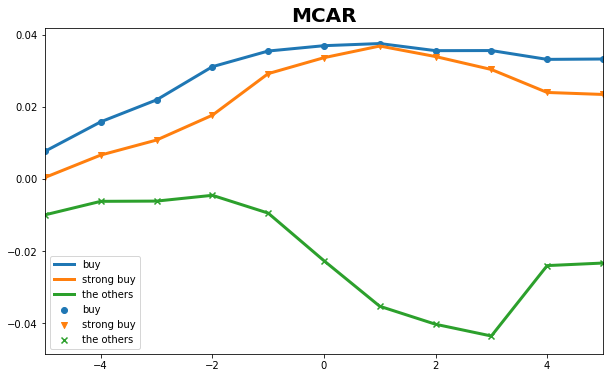

In [51]:
#x轴是-5到5，然后Y轴是car,也就是cumulative abnormal return, 然后分sample画三条，我还在研究你不用管它
fig,ax=plt.subplots(figsize=(10,6))
markers = ['o','v','x']
for i in range(3):
    ax.plot(np.arange(mcar.index.levels[1][0],mcar.index.levels[1][-1]+1),np.array(mcar[mcar.index.levels[0][i]]),
               label=mcar.index.levels[0][i],linewidth=3)
    ax.scatter(np.arange(mcar.index.levels[1][0],mcar.index.levels[1][-1]+1),np.array(mcar[mcar.index.levels[0][i]]),
               label=mcar.index.levels[0][i],marker=markers[i])
    ax.set_xlim(mcar.index.levels[1][0],mcar.index.levels[1][-1])
ax.legend()    
ax.set_title('MCAR',fontweight='bold',fontsize=20)

In [52]:
from bokeh.io import output_notebook,reset_output
reset_output()
output_notebook()
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend

Loading BokehJS ...

In [53]:
p = figure(plot_width=800, plot_height=400)

p.title.text = "MCAR"
p.title.align = "center"
p.title.text_color = "orange"
p.title.text_font_size = "25px"
p.title.background_fill_color = "blue"
colors = ['red','green','blue']

c = {}
d = {}
for i in range(3):
    c[i] = p.line(np.arange(mcar.index.levels[1][0],mcar.index.levels[1][-1]+1),np.array(mcar[mcar.index.levels[0][i]]),
               line_width=3,line_color=colors[i],)
    d[i] = p.square(np.arange(mcar.index.levels[1][0],mcar.index.levels[1][-1]+1),np.array(mcar[mcar.index.levels[0][i]]),
        fill_color=None, line_color=colors[i])

legend = Legend(items=[(mcar.index.levels[0][i],[c[i],d[i]])for i in range(3)], location=(0, -30))
p.add_layout(legend, 'right')

show(p)

In [54]:
np.array(mcar[mcar.index.levels[0][0]])

array([0.00765925, 0.0158398 , 0.0219325 , 0.0311419 , 0.03548908,
       0.03697171, 0.03756445, 0.03559254, 0.03562273, 0.03317341,
       0.03327364])

In [55]:
mcar[mcar.index.levels[0][0]]

rel_day
-5    0.007659
-4    0.015840
-3    0.021933
-2    0.031142
-1    0.035489
 0    0.036972
 1    0.037564
 2    0.035593
 3    0.035623
 4    0.033173
 5    0.033274
Name: car, dtype: float64

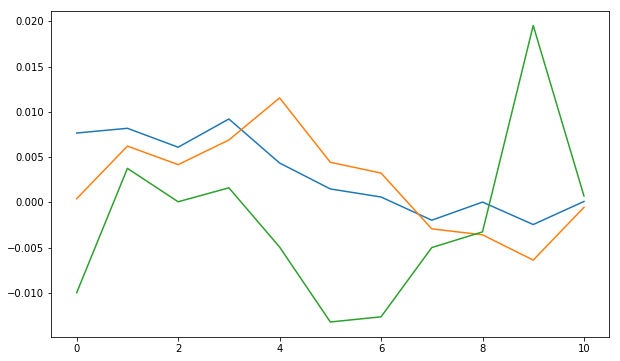

In [56]:
plt.figure(figsize=(10,6))
plt.plot(np.array(mar[mar.index.levels[0][0]]))
plt.plot(np.array(mar[mar.index.levels[0][1]]))
plt.plot(np.array(mar[mar.index.levels[0][2]]))